# The Movies Database
## Descriptive Analysis

Required imports

In [3]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
c:\Users\20111\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


## Exploring the data
Loading the cast file and exploring its contents 

In [7]:
cast_df = pd.read_csv(r'./data/credits.csv')
cast_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


Files are in JSON format which is not friendly to exploration.  
Parsing the data to get the actors info for each movie in a csv, from the cast column.  
(movie_id, actor_id, name, order, gender)
order: the order in the credits with 0 being the star of the movie    
Although crew are critical to movies quality, the audience rarely targets them when heading to a movie, so I will only take the director form the crew column.

In [6]:
# JSON requires name being in double quotes
# ast handles this pretty well 
import ast

After parsing the data getting the director per movie.

In [63]:
x = (cast_df['crew'][0])
y = ast.literal_eval(x)
for i in y:
    if i['job'] == 'Director':
        print(i['name'])

John Lasseter


Getting (movie_id, actor_id, name, order, gender)

In [64]:
x = (cast_df['cast'][0])
y = ast.literal_eval(x)
for k in y[0]:   
    print(k, y[0][k])


cast_id 14
character Woody (voice)
credit_id 52fe4284c3a36847f8024f95
gender 2
id 31
name Tom Hanks
order 0
profile_path /pQFoyx7rp09CJTAb932F2g8Nlho.jpg


Saving clean data into csv files

In [65]:
actors = [("movie_id", "actor_id", "name", "order", "gender")]
cast = cast_df['cast']
ids = cast_df['id']
N = cast.shape[0]

for i in range(N):
    info_str = cast[i]
    id = ids[i]
    info_dicts = ast.literal_eval(info_str)
    for entry in info_dicts:
        actors.append((id, entry['id'], entry['name'], entry['order'], entry['gender']))
    

In [14]:
directors = [("movie_id", "name")]
crew = cast_df['crew']
ids = cast_df['id']
N = crew.shape[0]

for i in range(N):
    info_str = crew[i]
    id = ids[i]
    info_dicts = ast.literal_eval(info_str)
    for entry in info_dicts:
        if entry['job'] == 'Director':
            directors.append((id, entry['name']))

Comparing number of movies to number of diectors it is apparent that some movies have multiple directors.  
Comparing number of actors per movie comes out to be average of 12 actors per movie.

In [86]:
print(len(directors), N)
print(len(actors)/N)

49049 45476
12.368612015128859


Output the parsed data 

In [10]:
import csv

In [88]:
# open the file in the write mode
f = open('./dataparsed/cast.csv', 'w')

# create the csv writer
writer = csv.writer(f)

N = len(actors)
for i in range(N):
    writer.writerow(actors[i])

In [18]:
# open the file in the write mode
f = open('./dataparsed/directors.csv', 'w', encoding= 'utf-8')

# create the csv writer
writer = csv.writer(f)

N = len(directors)
for i in range(N):
    writer.writerow(directors[i])  

Keywords are indicative to desire of watching a movie, maybe more specific than genres.

In [72]:
kw_df = pd.read_csv(r'./data/keywords.csv')
kw_df.head(1)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."


In [73]:
x = kw_df['keywords'][1]
y = ast.literal_eval(x)
print(y)

[{'id': 10090, 'name': 'board game'}, {'id': 10941, 'name': 'disappearance'}, {'id': 15101, 'name': "based on children's book"}, {'id': 33467, 'name': 'new home'}, {'id': 158086, 'name': 'recluse'}, {'id': 158091, 'name': 'giant insect'}]


In [74]:
N = kw_df.shape[0]
keywords = [("movie_id", "keyword_id", "keyword")]
for i in range(N):
    id = kw_df['id'][i]
    info_str = kw_df['keywords'][i]
    info_dicts = ast.literal_eval(info_str)
    for entry in info_dicts:
        keywords.append((id, entry['id'], entry['name']))

In [75]:
# open the file in the write mode
f = open('./dataparsed/keywords.csv', 'w')

# create the csv writer
writer = csv.writer(f)

N = len(keywords)
for i in range(N):
    writer.writerow(keywords[i])  

Parsing and refining movies metadata file

In [76]:
m_df = pd.read_csv(r'./data/movies_metadata.csv')
m_df.head(1)

C:\Users\20111\AppData\Local\Temp\ipykernel_22076\2480996344.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  m_df = pd.read_csv(r'./data/movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


Extracting genres

In [90]:
genres = [("movie_id", "genre_id", "genre")]
N = m_df.shape[0]

for i in range(N):
    id = m_df['id'][i]
    info_str = m_df['genres'][i]
    info_dicts = ast.literal_eval(info_str)

    for entry in info_dicts:
        genres.append((id, entry['id'], entry['name']))
    

In [91]:
# open the file in the write mode
f = open('./dataparsed/genres.csv', 'w')

# create the csv writer
writer = csv.writer(f)

N = len(genres)
for i in range(N):
    writer.writerow(genres[i])  

Staying with the movies metadata to extact more info.  


In [172]:
m_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

Status column in interesting, as only released movies will be of interest in this analysis

In [79]:
m_df.status.unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

In [92]:
m_df = m_df[m_df.status == 'Released'].reset_index()


Now having the rows of interest let's determine the columns (attributes) of interest for this analysis  

In [93]:
attributes = ['movie_id', 'title', 'popularity', 'budget', 'revenue', 'vote_average', 'vote_count']
m_df.columns

Index(['level_0', 'index', 'adult', 'belongs_to_collection', 'budget',
       'genres', 'homepage', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count'],
      dtype='object')

Getting these attributes from the metadata

In [94]:
attributes = ['movie_id', 'title', 'release_date', 'popularity', 'budget', 'revenue', 'vote_average', 'vote_count']
meta_data = [attributes]

N = m_df.shape[0]

for i in range(N):
    id = m_df.id[i]
    title = m_df.original_title[i]
    release_date = m_df.release_date[i]
    pop = m_df.popularity[i]
    budget = m_df.budget[i]
    revenue = m_df.revenue[i]
    vote_avg = m_df.vote_average[i]
    vote_cnt = m_df.vote_count[i]

    meta_data.append([id, title, release_date, pop, budget, revenue, vote_avg, vote_cnt])
    

Saving metadata

In [95]:
# open the file in the write mode
f = open('./dataparsed/metadata.csv', 'w')

# create the csv writer
writer = csv.writer(f)

N = len(meta_data)
for i in range(N):
    writer.writerow(meta_data[i])  

## Analysis Phase

Initiating a spark session, spart makes use of multiple CPUs and multiple processess, so I will make some aggreagations on the the whole ratings using Apache Spark

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('TMDb').getOrCreate()

In [3]:
df_pyspark = spark.read.csv(r'./data/ratings.csv', header= True, inferSchema= True)
df_pyspark.show()

+------+-------+------+----------+
|userId|movieId|rating| timestamp|
+------+-------+------+----------+
|     1|    110|   1.0|1425941529|
|     1|    147|   4.5|1425942435|
|     1|    858|   5.0|1425941523|
|     1|   1221|   5.0|1425941546|
|     1|   1246|   5.0|1425941556|
|     1|   1968|   4.0|1425942148|
|     1|   2762|   4.5|1425941300|
|     1|   2918|   5.0|1425941593|
|     1|   2959|   4.0|1425941601|
|     1|   4226|   4.0|1425942228|
|     1|   4878|   5.0|1425941434|
|     1|   5577|   5.0|1425941397|
|     1|  33794|   4.0|1425942005|
|     1|  54503|   3.5|1425941313|
|     1|  58559|   4.0|1425942007|
|     1|  59315|   5.0|1425941502|
|     1|  68358|   5.0|1425941464|
|     1|  69844|   5.0|1425942139|
|     1|  73017|   5.0|1425942699|
|     1|  81834|   5.0|1425942133|
+------+-------+------+----------+
only showing top 20 rows



In [6]:
# timestamp is not needed
df_pyspark = df_pyspark.drop('timestamp')

The size of the data is well over 25 Million ratings 

In [8]:
df_pyspark.count()

26024289

The number of movies is over 45k with users count over 250k

In [11]:
print(df_pyspark.select('movieId').distinct().count())
print(df_pyspark.select('userId').distinct().count())

45115
270896


I will be using PySpark to get insightful statistics that would help in the process of analysis and visulaization of data.  
Gathering the info about how many ratings does every movie has and the average rating of every movie, also the users rate of ratings in value and also quantity.

In [14]:
from pyspark.sql import functions as F

In [16]:
df_pyspark.groupBy('movieId').agg(F.mean('rating'), F.count('rating')).show()

+-------+------------------+-------------+
|movieId|       avg(rating)|count(rating)|
+-------+------------------+-------------+
|   1645| 3.516589990241182|        14346|
|   1591|2.6416020262782967|         6317|
|   3175| 3.586550320670942|        16216|
|   1580|3.5733178489322874|        42193|
|  68135| 3.097457627118644|         2478|
|    471| 3.654817548175482|        12195|
|   1088| 3.239810636881426|        13519|
|   1959|3.6369782971619364|         5990|
|   2122| 2.634513274336283|         2825|
|   2866|3.6019714479945617|         1471|
|  36525|3.4823726916620035|         1787|
|   3918|2.9595715272978578|         1447|
|   3997| 2.077287716405606|         2426|
|   6620| 3.789404132628544|         4162|
|   1238|3.9629796163069546|         3336|
|   2142| 3.038054538054538|         2457|
|   8638|3.9675026123301986|         4785|
|   2366|3.4740872335211956|         8162|
|   1342|2.9637979902087093|         3881|
|   3794| 3.250574712643678|          870|
+-------+--

In [17]:
df_pyspark.groupBy('userId').agg(F.mean('rating'), F.count('rating')).show()

+------+------------------+-------------+
|userId|       avg(rating)|count(rating)|
+------+------------------+-------------+
|   148|3.9651162790697674|           43|
|   463|2.8582375478927204|          261|
|   471|3.8238341968911915|          193|
|   496|               4.1|           10|
|   833| 4.333333333333333|            3|
|  1088| 4.466666666666667|           15|
|  1238|3.5942028985507246|           69|
|  1342|              3.25|            6|
|  1580|1.7916666666666667|           24|
|  1591|               4.0|           24|
|  1645| 2.983783783783784|          185|
|  1829| 3.634920634920635|           63|
|  1959|               3.0|            6|
|  2122|              4.05|           10|
|  2142|               4.2|            5|
|  2366| 3.522222222222222|          270|
|  2659| 3.986899563318777|          229|
|  2866|               3.6|           15|
|  3175| 4.266666666666667|           15|
|  3749|               3.6|            5|
+------+------------------+-------

It is vividly apparent that the users vary in their votes averages and the number of movies that they care to give a rating, also it goes without saying that it is vital for our analysis to know which movies are rated heavily or rated highly or both by users.

In [18]:
# saving the insights gained 
movies_agg = df_pyspark.groupBy('movieId').agg(F.mean('rating'), F.count('rating')).toPandas()
users_agg = df_pyspark.groupBy('userId').agg(F.mean('rating'), F.count('rating')).toPandas()

In [20]:
movies_agg.columns = ['movieId', 'rating_avg', 'rating_count']
users_agg.columns = ['userId', 'rating_avg', 'rating_count']

For easier categorizing of the data will be rounding the average votes

In [22]:
movies_agg.round(2)
users_agg.round(2)

movieId           int32
rating_avg      float64
rating_count      int64
dtype: object

In [23]:
# save to dataclean
movies_agg.to_csv(r'./dataclean/movies_ratings.csv')
movies_agg.to_csv(r'./dataclean/users_ratings.csv')

## Data integrity
I have collected the data myself from the ratings data, they are present in the metadata file also, we can compare the two using the ones I have collected as reference if any errors was found

In [21]:
meta_data = pd.read_csv(r'./dataclean/metadata.csv')
movie_ratings = pd.read_csv(r'./dataclean/movies_ratings.csv')

In [22]:
# First check the movies ids to be the same in both
meta_id = set(meta_data.movie_id.unique())
ratings_id = set(movie_ratings.movieId.unique())
meta_id == ratings_id

True

Sets turned out to be not identical, some columns of the movie_ratings will be dropped and also from the ratings 

In [23]:
len(meta_id), len(ratings_id)

(7493, 7493)

In [24]:
print(f"The number of movies only in the metadata {len(meta_id - ratings_id)}")
print(f"The number of movies only in the ratings {len(ratings_id - meta_id)}")
print(f"The number of movies only in both {len(ratings_id & meta_id)}")

The number of movies only in the metadata 0
The number of movies only in the ratings 0
The number of movies only in both 7493


After investegation, the ids of interest are the nearly 7.5k movies that we have metadata about and are actually rated by users, this requires refining the cleaned data to ensure integrity

In [25]:
target_ids = ratings_id & meta_id

In [26]:
li = list(target_ids)
len(li)

7493

In [27]:
# files are split into 2 categories, ones not affected by the filter
# and others affected these being the aggregate functions previously calculated by pyspark
# handling the filters
# it has come to my attention the presence of duplicates from a later phase
# so went back and added dropping duplicates in cleaning
simple_filters_files = ['cast', 'directors', 'genres', 'keywords', 'metadata']

for filename in simple_filters_files:
    df = pd.read_csv(f'./dataparsed/{filename}.csv')
    df = df[df.movie_id.isin(target_ids)]
    df.drop_duplicates(inplace= True)
    df.to_csv(f'./dataclean/{filename}.csv', header= True, index= False)
    
    

In [100]:
# second we should filter the ratings before applying aggregate functions again
ratings = pd.read_csv(r'./data/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [101]:
# timestamp is still not needed
ratings.drop(columns= ['timestamp'], inplace= True)

In [102]:
ratings = ratings[ratings.movieId.isin(target_ids)]
len(ratings)

11415489

We are left with legit 11 Million ratings for the 7500 movies 

In [103]:
# saving the cleaned ratings
ratings.to_csv(r'./dataclean/ratings.csv', header= True, index= False)

Using map reduce on data, apche spark has it underlying 

In [33]:
# Now I should utilize pyspark to aggregate the Millions of records of ratings
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('TMDb').getOrCreate()

In [48]:
df_pyspark = spark.read.csv(r'./dataclean/ratings.csv', header= True, inferSchema= True)
df_pyspark.show(5)

+------+-------+------+
|userId|movieId|rating|
+------+-------+------+
|     1|    110|   1.0|
|     1|    147|   4.5|
|     1|    858|   5.0|
|     1|   1246|   5.0|
|     1|   1968|   4.0|
+------+-------+------+
only showing top 5 rows



In [49]:
from pyspark.sql import functions as F

In [60]:
target_agg_attributes = ['movieId', 'userId']

for att in target_agg_attributes:
    df_agg = df_pyspark.groupBy(att).agg(F.mean('rating'), F.count('rating')).toPandas()
    df_agg.columns = [att, 'rating_avg', 'rating_count']
    df_agg = df_agg.round(2)
    df_agg.to_csv(f'./dataclean/{att[: -2]}s_ratings.csv', header= True, index= False)


## Recomendation System
Visualizations are pivotal in the process of data analysis
### Visualizations

In [5]:
#set seaborn plotting aesthetics as default
sns.set()

We can test the interest of our voters in the movie eras by checking the number of votes per year

In [219]:
meta_data = pd.read_csv(r'./dataclean/metadata.csv')
movie_ratings = pd.read_csv(r'./dataclean/movies_ratings.csv')
print(set(meta_data.movie_id) - set(movie_ratings.movieId))
len(meta_data) , len(movie_ratings)
# a duplicate was found @ id = 4912
# dealt with manually 11.331072 + 7.645827	
# meta_data[meta_data.movie_id == 4912]

set()


(7494, 7493)

In [220]:
# validating the integrity of the data it came to my attention a duplicate is in metadata
# I will go on compensate with the average of both
# As in this link, max deems appropriate https://developers.themoviedb.org/3/getting-started/popularity
# my hypothesis is that there were two records for this movie on is more updated than the other
# so averaging is good, both values can be found in parsed metadata
# (11.331072 + 7.645827)/2

It can be seen that data is now validated, the unique values in both files is the same

In [221]:
movie_ratings.rename(columns= {'movieId': 'movie_id'}, inplace= True)
movie_df = pd.merge(meta_data,movie_ratings,on='movie_id')
movie_df.head()

,movie_id,title,release_date,popularity,budget,revenue,vote_average,vote_count,rating_avg,rating_count
0,862,Toy Story,1995-10-30,21.946943,30000000,373554033.0,7.7,5415.0,3.60,374
1,8844,Jumanji,1995-12-15,17.015539,65000000,262797249.0,6.9,2413.0,3.76,123
2,949,Heat,1995-12-15,17.924927,60000000,187436818.0,7.7,1886.0,3.91,2345
3,710,GoldenEye,1995-11-16,14.686036,58000000,352194034.0,6.6,1194.0,2.74,1319
4,1408,Cutthroat Island,1995-12-22,7.284477,98000000,10017322.0,5.7,137.0,3.71,13888


There is a difference between the vote_avg and count in the metadata rather than the one collected from the ratings data, as the recommendation engine relies heavily on the ratings so we will stick to this   
https://www.themoviedb.org/talk/5f879e57a275020039cc79ee, the metadata values are provided from the API, they maybe of use later

### Number of movies per year

In [222]:
movie_df.dtypes

movie_id          int64
title            object
release_date     object
popularity      float64
budget            int64
revenue         float64
vote_average    float64
vote_count      float64
rating_avg      float64
rating_count      int64
dtype: object

In [223]:
movie_df.release_date = pd.to_datetime(movie_df.release_date) #, format= '%Y-%m-%d')
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7494 entries, 0 to 7493
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie_id      7494 non-null   int64         
 1   title         7494 non-null   object        
 2   release_date  7486 non-null   datetime64[ns]
 3   popularity    7494 non-null   float64       
 4   budget        7494 non-null   int64         
 5   revenue       7494 non-null   float64       
 6   vote_average  7494 non-null   float64       
 7   vote_count    7494 non-null   float64       
 8   rating_avg    7494 non-null   float64       
 9   rating_count  7494 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 644.0+ KB


In [224]:
# dropping 8 movies with no known release date
movie_df.dropna().reset_index(inplace= True)

In [225]:
movie_df['release_year'] = movie_df.release_date.dt.year
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7494 entries, 0 to 7493
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie_id      7494 non-null   int64         
 1   title         7494 non-null   object        
 2   release_date  7486 non-null   datetime64[ns]
 3   popularity    7494 non-null   float64       
 4   budget        7494 non-null   int64         
 5   revenue       7494 non-null   float64       
 6   vote_average  7494 non-null   float64       
 7   vote_count    7494 non-null   float64       
 8   rating_avg    7494 non-null   float64       
 9   rating_count  7494 non-null   int64         
 10  release_year  7486 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(3), object(1)
memory usage: 702.6+ KB


In [226]:
year_agg = movie_df.groupby('release_year', as_index= False).agg({'rating_count': ['sum', 'mean', 'count'], 'rating_avg': ['sum', 'mean']})
year_agg.columns = year_agg.columns.to_flat_index()
year_agg.columns = ['release_year', 'total_votes', 'avg_vote', 'num_movies', 'total_rating', 'avg_rating']
year_agg.head()

,release_year,total_votes,avg_vote,num_movies,total_rating,avg_rating
0,1890.0,24,24.000000,1,3.56,3.560000
1,1891.0,17,8.500000,2,7.22,3.610000
2,1892.0,10,10.000000,1,3.50,3.500000
3,1894.0,8,2.666667,3,9.58,3.193333
4,1895.0,51,25.500000,2,5.15,2.575000


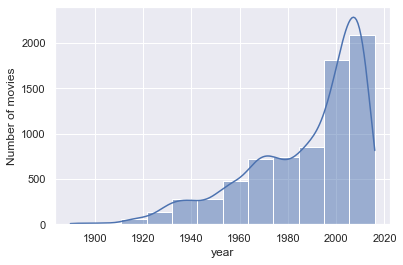

In [86]:
sns.histplot(data= movie_df, x= 'release_year', bins= 12, kde= True)
plt.xlabel('year')
plt.ylabel('Number of movies');

As expected the data is skewed to the right, the number of movies is increasing the recent years, out of resepect to the classics that hold their places in the 40s like 12 Angry Men and people who admire classics they still should be included in the recommender system  
Let us check the number of votes each year gets

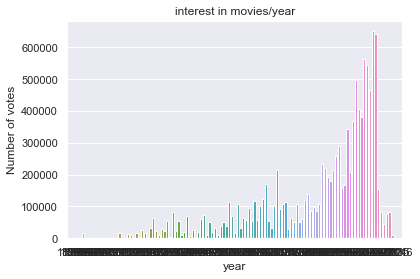

In [98]:
sns.barplot(data= year_agg, x= year_agg.release_year, y= year_agg.total_votes)
plt.title('interest in movies/year');
plt.xlabel('year')
plt.ylabel('Number of votes');

Although figure is crowded we can see that people's interest is focused on new movies, with the latest years being less as maybe people didn't get the chance to watch it in the cinema or no Blu-ray version is released

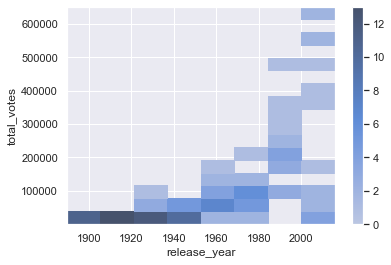

In [72]:
sns.histplot(data= year_agg, x= year_agg.release_year, y= year_agg.total_votes, cbar= True)
plt.title('interest in movies of the year')
plt.xlabel('year')
plt.ylabel('Number of votes');

In this plot, the number of movies is represented in the color of the square, we can see the number of years having less than 100k votes in each 10 years to have a clearer perception of the data we have  
We can see that the 1960s movies are in contetion and are a drawer for interest with 2 years having more than 150k votes, my biggest concern was if some of the older movies were not well represented they would be lost in the mix, but I can see that however the number of movies was smaller, people tune in and care to vote  
The earlier years may have fewer votes density but this is not a problem as they also have fewer movies density 

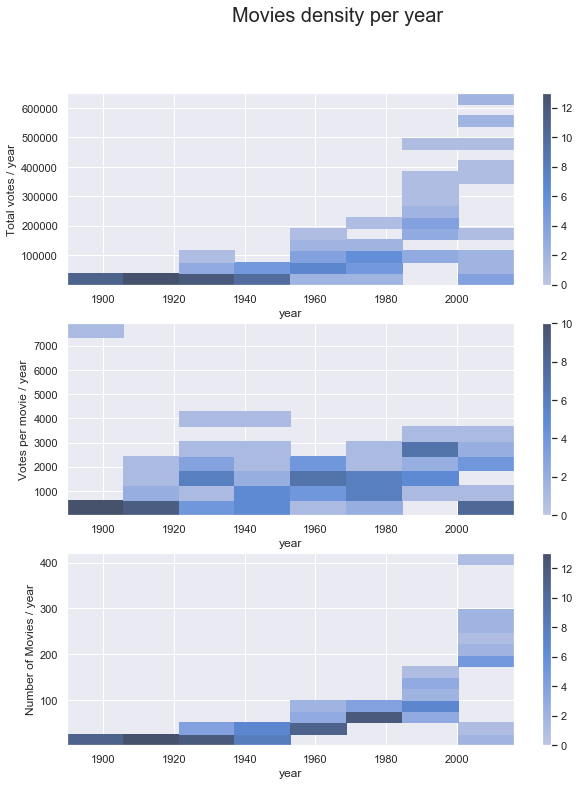

In [109]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(3, figsize= (10,12))

plt.suptitle('Movies density per year', fontsize= 20)
for ax in axes:
    ax.set_xlabel('year')

axes[0].set_ylabel('Total votes / year')
sns.histplot(data= year_agg, x='release_year', y= 'total_votes', ax= axes[0], cbar= True)

axes[1].set_ylabel('Votes per movie / year')
sns.histplot(data= year_agg, x='release_year', y= 'avg_vote', ax= axes[1], cbar= True)

axes[2].set_ylabel('Number of Movies / year')
sns.histplot(data= year_agg, x='release_year', y= 'num_movies', ax= axes[2], cbar= True)

for ax in axes:
    ax.label_outer()

Through these there plots we can verify the nearly uniform distribution of our votes, the middle figure shows the number of votes per movies each year appearing to be of the same distribution since the 1920s, and that is explained by the bottom figure with number of movies per year in our ratings data

Text(0, 0.5, 'Average movies rating per year')

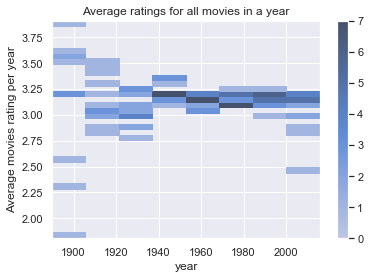

In [112]:
sns.histplot(data= year_agg, x= 'release_year', y= 'avg_rating', cbar= True)
plt.title('Average ratings for all movies in a year')
plt.xlabel('year')
plt.ylabel('Average movies rating per year')

while some years are better and worse than others, the majority of years lie in the above average area ratings for all years, implying that the users give a variety of ratings and each year has a variety of movies

### Machine learning component

In [1]:
from pyspark.sql import SparkSession
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS

In [2]:
# initiating spark session
spark = SparkSession.builder.appName('TMDb').getOrCreate()

In [3]:
# loading ratings
df = spark.read.csv(r'./dataclean/ratings.csv', inferSchema= True, header= True)

In [4]:
(train, test) = df.randomSplit([0.95, 0.05], seed= 27)

In [5]:
als = ALS(maxIter= 5, regParam= 0.01, userCol= 'userId', itemCol= 'movieId', ratingCol= 'rating', \
    coldStartStrategy= "drop", nonnegative= True)

In [6]:
model = als.fit(train)

In [7]:
pred = model.transform(test)

In [8]:
pred_num = pred.toPandas()
pred_num.to_csv(r'./predictions/als.csv')

In [9]:
eval = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")

In [10]:
rmse = eval.evaluate(pred)
print(f"RMSE: {rmse}")

RMSE: 0.8833992017935814


Now it is acceptable to use the model on the whole data to make predictions to all users

In [11]:
model = als.fit(df)

In [12]:
pred = model.transform(df)

In [13]:
rmse = eval.evaluate(pred)
print(f"RMSE: {rmse}")

RMSE: 0.7487834943206226


### Content Based Filtering

We now need default recommendations for new users which requires us to go for the data and check it.

In [110]:
movie_df.columns

Index(['movie_id', 'title', 'release_date', 'popularity', 'budget', 'revenue',
       'vote_average', 'vote_count', 'rating_avg', 'rating_count',
       'release_year'],
      dtype='object')

In [111]:
movie_df.sort_values(by= 'vote_count', ascending= False).head(10)

,movie_id,title,release_date,popularity,budget,revenue,vote_average,vote_count,rating_avg,rating_count,release_year
3605,27205,Inception,2010-07-14,29.108149,160000000,8.255328e+08,8.1,14075.0,3.70,5,2010.0
3124,155,The Dark Knight,2008-07-16,123.167259,185000000,1.004558e+09,8.3,12269.0,3.40,1319,2008.0
4831,157336,Interstellar,2014-11-05,32.213481,165000000,6.751200e+08,8.1,11187.0,2.50,4,2014.0
4959,118340,Guardians of the Galaxy,2014-07-30,53.291601,170000000,7.733286e+08,7.9,10014.0,4.00,1,2014.0
839,550,Fight Club,1999-10-15,63.869599,63000000,1.008538e+08,8.3,9678.0,3.08,3477,1999.0
729,603,The Matrix,1999-03-30,33.366332,63000000,4.635174e+08,7.9,9079.0,2.96,622,1999.0
3147,1726,Iron Man,2008-04-30,22.073099,140000000,5.851742e+08,7.4,8951.0,2.96,2477,2008.0
1339,120,The Lord of the Rings: The Fellowship of the Ring,2001-12-18,32.070725,93000000,8.713684e+08,8.0,8892.0,2.88,166,2001.0
80,680,Pulp Fiction,1994-09-10,140.950236,8000000,2.139288e+08,8.3,8670.0,3.55,1246,1994.0
88,278,The Shawshank Redemption,1994-09-23,51.645403,25000000,2.834147e+07,8.5,8358.0,3.02,1178,1994.0


We can see that there are many popular movies in this list, let's check if our users agree

In [112]:
movie_df.sort_values(by= 'rating_count', ascending= False).head(10)

,movie_id,title,release_date,popularity,budget,revenue,vote_average,vote_count,rating_avg,rating_count,release_year
1145,318,The Million Dollar Hotel,2000-02-09,4.938231,8000000,0.0,5.9,76.0,4.43,91082,2000.0
1662,296,Terminator 3: Rise of the Machines,2003-07-02,20.818907,200000000,435000000.0,5.9,2177.0,4.17,87901,2003.0
974,593,Солярис,1972-03-20,11.059785,0,0.0,7.7,364.0,4.15,84078,1972.0
256,260,The 39 Steps,1935-06-01,5.865697,0,0.0,7.4,217.0,4.13,77045,1935.0
1374,480,Monsoon Wedding,2001-08-30,10.625504,0,0.0,6.8,59.0,3.66,74355,2001.0
76,527,Once Were Warriors,1994-09-02,4.025276,0,2201126.0,7.6,106.0,4.27,67662,1994.0
82,110,Trois couleurs : Rouge,1994-05-27,7.832755,0,0.0,7.8,246.0,4.02,66512,1994.0
2942,2959,License to Wed,2007-07-04,7.102076,35000000,69307224.0,5.3,258.0,4.23,60024,2007.0
1358,150,48 Hrs.,1982-12-07,15.297121,12000000,78868508.0,6.5,364.0,3.88,57416,1982.0
1774,780,La passion de Jeanne d'Arc,1928-04-21,8.903953,0,0.0,8.2,159.0,3.40,57232,1928.0


We cannot see much of any famous movies here! Looks like the data is not the genuine stuff that generated the original API statistics, the data provided in this dataset is not leaning towards the mainstream audience  
It is fortunate that ALS works well with sparse data distributions, now the challenge introduces itself to recommend movies for a user with one rating or with one search or fewer  
We can use the clean data we have to generate recommendations based on movies similarities between movies

After elaborate search, my proposed method is to use the movie's metadata to detect the similarities between movies 

In [15]:
directors = pd.read_csv(r'./dataclean/directors.csv')
directors.head()

,movie_id,name
0,862,John Lasseter
1,8844,Joe Johnston
2,949,Michael Mann
3,710,Martin Campbell
4,1408,Renny Harlin


As established earlier some movies have multiple directors we need that grouped together

In [16]:
directors_gp = directors.groupby('movie_id').name.apply(list).reset_index(name='directors')
directors_gp.head()

,movie_id,directors
0,2,[Aki Kaurismäki]
1,3,[Aki Kaurismäki]
2,5,"[Allison Anders, Alexandre Rockwell, Robert Ro..."
3,6,[Stephen Hopkins]
4,11,[George Lucas]


In [17]:
directors_gp.shape

(7419, 2)

In [18]:
cast = pd.read_csv(r'./dataclean/cast.csv')
cast.head()

,movie_id,actor_id,name,order,gender
0,862,31,Tom Hanks,0,2
1,862,12898,Tim Allen,1,2
2,862,7167,Don Rickles,2,2
3,862,12899,Jim Varney,3,2
4,862,12900,Wallace Shawn,4,2


Let's explore the order factor to test its significance to the actor's participation in a movie

In [19]:
# stats over the whole dataframe
cast.order.describe()

count    111149.000000
mean         14.300767
std          19.548014
min           0.000000
25%           4.000000
50%           8.000000
75%          17.000000
max         313.000000
Name: order, dtype: float64

50% of the values are below 8, a staggering movie has over 300 credits, let's look further into this 

In [20]:
# getting stats with respect to the number of cast members creditted per movie 
cast.groupby('movie_id').order.describe()['max'].describe()

count    7238.000000
mean       14.630699
std        14.718959
min         0.000000
25%         7.000000
50%        11.000000
75%        17.000000
max       313.000000
Name: max, dtype: float64

As seen in stats, some movies have up to 300 actors credited, yet 50% of the movies have less than 11 actors creditted, now I want to focus on the money makers the drawers to watching the movie, so I am going to cut short to 11 actors, which is decent given that the oscars credits supporting roles and leading roles in a movie limited to 4 awards, which has not seen more than 2 actors nominated per each.

In [21]:
cast = cast[cast.order < 11]
cast.order.describe()

count    64889.000000
mean         4.493119
std          3.066218
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         10.000000
Name: order, dtype: float64

In [22]:
cast.groupby('movie_id').name.apply(list).reset_index(name='new')

,movie_id,new
0,2,"[Turo Pajala, Susanna Haavisto, Matti Pellonpä..."
1,3,"[Matti Pellonpää, Kati Outinen, Sakari Kuosman..."
2,5,"[Tim Roth, Antonio Banderas, Jennifer Beals, M..."
3,6,"[Emilio Estevez, Cuba Gooding Jr., Denis Leary..."
4,11,"[Mark Hamill, Harrison Ford, Carrie Fisher, Pe..."
...,...,...
7230,176077,"[Jake Hoffman, Nikki Reed, Thomas Dekker, Scot..."
7231,176085,"[Anna Margaret Hollyman, Laura Lemar-Goldsboro..."
7232,176143,"[Margo, Tom Neal, J. Carrol Naish, Robert Ryan..."
7233,176167,"[Armin Jordan, Wolfgang Schöne, Martin Sperr, ..."


In [23]:
cast_gp = cast.groupby('movie_id').name.apply(list).reset_index(name='cast')
cast_gp.head()

,movie_id,cast
0,2,"[Turo Pajala, Susanna Haavisto, Matti Pellonpä..."
1,3,"[Matti Pellonpää, Kati Outinen, Sakari Kuosman..."
2,5,"[Tim Roth, Antonio Banderas, Jennifer Beals, M..."
3,6,"[Emilio Estevez, Cuba Gooding Jr., Denis Leary..."
4,11,"[Mark Hamill, Harrison Ford, Carrie Fisher, Pe..."


In [24]:
cast_gp.shape

(7235, 2)

In [25]:
keywords = pd.read_csv(r'./dataclean/keywords.csv')
keywords.head()

,movie_id,keyword_id,keyword
0,862,931,jealousy
1,862,4290,toy
2,862,5202,boy
3,862,6054,friendship
4,862,9713,friends


In [26]:
keywords_gp = keywords.groupby('movie_id').keyword.apply(list).reset_index(name='keywords')
keywords_gp.head()

,movie_id,keywords
0,2,"[underdog, prison, factory worker, prisoner, h..."
1,3,"[salesclerk, helsinki, garbage, independent film]"
2,5,"[hotel, new year's eve, witch, bet, hotel room..."
3,6,"[chicago, drug dealer, boxing match, escape, o..."
4,11,"[android, galaxy, hermit, death star, lightsab..."


In [27]:
keywords_gp.shape

(5683, 2)

In [28]:
genres = pd.read_csv(r'./dataclean/genres.csv')
genres.head()

,movie_id,genre_id,genre
0,862,16,Animation
1,862,35,Comedy
2,862,10751,Family
3,8844,12,Adventure
4,8844,14,Fantasy


In [29]:
genres_gp = genres.groupby('movie_id').genre.apply(list).reset_index(name= 'genres')
genres_gp.head()

,movie_id,genres
0,2,"[Drama, Crime]"
1,3,"[Drama, Comedy]"
2,5,"[Crime, Comedy]"
3,6,"[Action, Thriller, Crime]"
4,11,"[Adventure, Action, Science Fiction]"


In [30]:
genres_gp.shape

(7135, 2)

In [227]:
movies_gp = pd.merge(cast_gp, directors_gp, on= 'movie_id', how= 'outer')
movies_gp.head()

,movie_id,cast,directors
0,2,"[Turo Pajala, Susanna Haavisto, Matti Pellonpä...",[Aki Kaurismäki]
1,3,"[Matti Pellonpää, Kati Outinen, Sakari Kuosman...",[Aki Kaurismäki]
2,5,"[Tim Roth, Antonio Banderas, Jennifer Beals, M...","[Allison Anders, Alexandre Rockwell, Robert Ro..."
3,6,"[Emilio Estevez, Cuba Gooding Jr., Denis Leary...",[Stephen Hopkins]
4,11,"[Mark Hamill, Harrison Ford, Carrie Fisher, Pe...",[George Lucas]


In [124]:
movies_gp.shape

(7464, 3)

In [228]:
temp = pd.merge(keywords_gp, genres_gp, on= 'movie_id', how= 'left')
temp.head()

,movie_id,keywords,genres
0,2,"[underdog, prison, factory worker, prisoner, h...","[Drama, Crime]"
1,3,"[salesclerk, helsinki, garbage, independent film]","[Drama, Comedy]"
2,5,"[hotel, new year's eve, witch, bet, hotel room...","[Crime, Comedy]"
3,6,"[chicago, drug dealer, boxing match, escape, o...","[Action, Thriller, Crime]"
4,11,"[android, galaxy, hermit, death star, lightsab...","[Adventure, Action, Science Fiction]"


In [229]:
temp = pd.merge(temp, movie_df[['movie_id', 'title', 'vote_average']], on='movie_id', how='outer')
temp.head(1)

,movie_id,keywords,genres,title,vote_average
0,2,"[underdog, prison, factory worker, prisoner, h...","[Drama, Crime]",Ariel,7.1


In [230]:
movies_gp = pd.merge(movies_gp, temp, on= 'movie_id', how= 'outer')
movies_gp.head()

,movie_id,cast,directors,keywords,genres,title,vote_average
0,2,"[Turo Pajala, Susanna Haavisto, Matti Pellonpä...",[Aki Kaurismäki],"[underdog, prison, factory worker, prisoner, h...","[Drama, Crime]",Ariel,7.1
1,3,"[Matti Pellonpää, Kati Outinen, Sakari Kuosman...",[Aki Kaurismäki],"[salesclerk, helsinki, garbage, independent film]","[Drama, Comedy]",Varjoja paratiisissa,7.1
2,5,"[Tim Roth, Antonio Banderas, Jennifer Beals, M...","[Allison Anders, Alexandre Rockwell, Robert Ro...","[hotel, new year's eve, witch, bet, hotel room...","[Crime, Comedy]",Four Rooms,6.5
3,6,"[Emilio Estevez, Cuba Gooding Jr., Denis Leary...",[Stephen Hopkins],"[chicago, drug dealer, boxing match, escape, o...","[Action, Thriller, Crime]",Judgment Night,6.4
4,11,"[Mark Hamill, Harrison Ford, Carrie Fisher, Pe...",[George Lucas],"[android, galaxy, hermit, death star, lightsab...","[Adventure, Action, Science Fiction]",Star Wars,8.1


In [231]:
movies_gp.isna().sum()

movie_id           0
cast             258
directors         74
keywords        1810
genres          1882
title              0
vote_average       0
dtype: int64

The objective now is to count the feature values defining each movie, to do so a fine trick I saw online is to strip the words of whitespaces, converting to lowercase, this makes each actor keep his name intact so that (tomhanks) and (tomholland) are not confused just considering (tom), see what I did there?

In [232]:
# following steps in this notebook
# https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system/notebook
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    # should leave nulls alone
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]

In [233]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'directors', 'genres']

for feature in features:
    movies_gp[feature] = movies_gp[feature].apply(clean_data)

In [234]:
movies_gp.head(2)

,movie_id,cast,directors,keywords,genres,title,vote_average
0,2,"[turopajala, susannahaavisto, mattipellonpää, ...",[akikaurismäki],"[underdog, prison, factoryworker, prisoner, he...","[drama, crime]",Ariel,7.1
1,3,"[mattipellonpää, katioutinen, sakarikuosmanen,...",[akikaurismäki],"[salesclerk, helsinki, garbage, independentfilm]","[drama, comedy]",Varjoja paratiisissa,7.1


I will go on and join all these features defining the movies, apparently there is something called soup! I will stay on the mentioned recommender since I have already cited it! soup is a python library that is used to extract data from HTML files so I can see the resemblance.

In [235]:
movies_gp.isna().sum()

movie_id           0
cast             258
directors         74
keywords        1810
genres          1882
title              0
vote_average       0
dtype: int64

In [236]:
# Eliminate NA values for soup to work
movies_gp.fillna('', inplace= True)

In [237]:
movies_gp.isna().sum()

movie_id        0
cast            0
directors       0
keywords        0
genres          0
title           0
vote_average    0
dtype: int64

In [238]:
# Function joins the words in each list 
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + ' '.join(x['directors']) + ' ' + ' '.join(x['genres'])

In [239]:
movies_gp['soup'] = movies_gp.apply(create_soup, axis= 1)

Counting the frequency of each word in each movie

In [240]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(movies_gp['soup'])

In [241]:
count_matrix.shape

(7494, 50987)

There are nearly 50k unique features in these movies

Cosine similarity is the angle between two vectors, if two vectors have similar directions on a 2D grid, the angle between them gets smaller and the cosine of it nears 1

In [242]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [243]:
cosine_sim.shape

(7494, 7494)

In [271]:
# Getting a title of a movie 
movie_df[movie_df.title.str.contains('Toy')]

,movie_id,title,release_date,popularity,budget,revenue,vote_average,vote_count,rating_avg,rating_count,release_year
0,862,Toy Story,1995-10-30,21.946943,30000000,373554033.0,7.7,5415.0,3.60,374,1995.0
870,25898,Babes in Toyland,1934-12-14,7.768271,0,0.0,6.6,28.0,3.88,184,1934.0
3566,26962,Puppet Master vs Demonic Toys,2004-12-18,1.945492,0,0.0,2.7,12.0,3.08,6,2004.0
3656,47670,The Christmas Toy,1986-12-06,0.923952,0,0.0,4.8,7.0,3.64,45,1986.0
3770,108869,Toys in the Attic,1963-07-31,0.925414,0,0.0,7.5,2.0,2.17,3,1963.0
4757,84152,Dollman vs. Demonic Toys,1993-10-13,1.050160,0,0.0,4.2,12.0,3.85,8025,1993.0
5221,70984,"Silent Night, Deadly Night 5: The Toy Maker",1991-11-06,1.240357,0,0.0,5.1,11.0,3.29,328,1991.0


In [245]:
# Construct a reverse map of indices and movie titles
movie_bytitle = pd.Series(movies_gp.index, index=movies_gp['title'])

In [246]:
# refrence https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system#kln-56
def get_similar_movies(title, n= 10):
    idx = movie_bytitle[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:n+1]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies_gp['title'].iloc[movie_indices]

In [158]:
get_similar_movies('Batman Begins')

111                          The Dark Knight
316                           Batman & Robin
3609    3 Ninjas: High Noon at Mega Mountain
212                                   Batman
5535            Teenage Mutant Ninja Turtles
285                           Batman Returns
3964                           Hero at Large
4392                       If Tomorrow Comes
5435                                   초록물고기
315                           Batman Forever
Name: title, dtype: object

In [162]:
get_similar_movies('Avengers: Age of Ultron')

1071              Captain America: The First Avenger
5624                                         Ant-Man
6043                        Marvel One-Shot: Item 47
1061                                        Iron Man
1059                             The Incredible Hulk
2716                                     Superman II
1288                        X-Men Origins: Wolverine
1213                    4: Rise of the Silver Surfer
6024                         Guardians of the Galaxy
1148    Star Wars: Episode III - Revenge of the Sith
Name: title, dtype: object

In [170]:
get_similar_movies('Inception')

3285                        Beneath Loch Ness
2168    Sky Captain and the World of Tomorrow
5742                          Captain America
2606                        The Time Shifters
2844                            Los Bastardos
905                   Blood: The Last Vampire
2229                                  Beowulf
2528                     The Wilby Conspiracy
4309                             The Delivery
153                        Star Trek: Nemesis
Name: title, dtype: object

The movies similarites are not decisive enough to get recommendations, I think the quality of the movie should get into play

In [248]:
def get_recommendation(title, n= 10):
    idx = movie_bytitle[title]

    sim_scores = np.array(cosine_sim[idx])
    ratings = np.array(movies_gp.vote_average)/10

    f_score = (ratings * sim_scores) / (ratings + sim_scores)

    f_score = list(enumerate(f_score))
    # Sort the movies based on the similarity scores
    f_score = sorted(f_score, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    f_score = f_score[1:n+1]

    # Get the movie indices
    movie_indices = [i[0] for i in f_score]

    # Return the top 10 most similar movies
    return movies_gp['title'].iloc[movie_indices]
    

In [249]:
get_recommendation('Batman Begins')

111     The Dark Knight
316      Batman & Robin
212              Batman
285      Batman Returns
1019     State of Grace
193         The Killing
3721             仁義なき戦い
315      Batman Forever
1172           Superman
803        The Prestige
Name: title, dtype: object

In [250]:
get_recommendation('Avengers: Age of Ultron')

68                    Predator
418               Spider-Man 3
59                        Tron
263              Jurassic Park
298          Kill Bill: Vol. 2
360                      Shaft
261          Snakes on a Plane
57                  Armageddon
145     Star Trek: Generations
152    Star Trek: Insurrection
Name: title, dtype: object

In [251]:
get_recommendation('Inception')

68                                  Predator
145                   Star Trek: Generations
905                  Blood: The Last Vampire
448                                  Солярис
152                  Star Trek: Insurrection
59                                      Tron
913                                      綠草地
997                               The Island
1562    The Chronicles of Riddick: Dark Fury
1069                                    Next
Name: title, dtype: object

There is some bias in equally scoring both the rating and similarity, towards rating, let's try a weighted average but with higher values for similarity

In [257]:
def get_recommendation(title, a=0.7, n= 10):
    idx = movie_bytitle[title]

    sim_scores = np.array(cosine_sim[idx])
    ratings = np.array(movies_gp.vote_average)/10

    p_score = ((1-a) * ratings + a * sim_scores) / (ratings + sim_scores)

    p_score = list(enumerate(p_score))
    # Sort the movies based on the similarity scores
    p_score = sorted(p_score, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    p_score = p_score[1:n+1]

    # Get the movie indices
    movie_indices = [i[0] for i in p_score]

    # Return the top 10 most similar movies
    return movies_gp['title'].iloc[movie_indices]

In [262]:
get_recommendation('Inception', 0.8)

905              Blood: The Last Vampire
913                                  綠草地
999              Speed 2: Cruise Control
919     Teenage Mutant Ninja Turtles III
1069                                Next
1045                       Death Machine
1066               The Prisoner of Zenda
997                           The Island
1002                             The Net
923                       Changing Lanes
Name: title, dtype: object

The Dark Knight is also a Nolan movie, but this weighted average formula is not working in an acceptable manner

Try and limit the similar movies to top similar, then introduce the vote average

In [264]:
def get_recommendation(title, n= 10):
    idx = movie_bytitle[title]

    sim_scores = list(enumerate(cosine_sim[idx]))
        
    # Sort the movies based on the similarity scores
    selected_subset = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the most similar movies
    selected_subset = selected_subset[1:2 * n]

    # Get the movie indices
    movie_indices = [i[0] for i in selected_subset]
    selected_subset = np.array([i[1] for i in selected_subset])

    ratings = np.array(movies_gp.vote_average)/10
    ratings = ratings[movie_indices] 

    f_score = (ratings * selected_subset) / (ratings + selected_subset)

    f_score = list(zip(movie_indices, f_score))

    f_score = sorted(f_score, key=lambda x: x[1], reverse=True)

    movie_indices = [i[0] for i in f_score]
    movie_indices = movie_indices[0: n]
    # Return the top n most similar movies
    return movies_gp['title'].iloc[movie_indices]
    

In [265]:
get_recommendation('Batman Begins')

111                          The Dark Knight
316                           Batman & Robin
212                                   Batman
285                           Batman Returns
4392                       If Tomorrow Comes
3964                           Hero at Large
5535            Teenage Mutant Ninja Turtles
5435                                   초록물고기
6161                             The Bat Man
3609    3 Ninjas: High Noon at Mega Mountain
Name: title, dtype: object

The two chinese movie is a crime movie which makes me feel better about this 

In [266]:
get_recommendation('The Godfather')

186      The Godfather: Part II
188     The Godfather: Part III
6775        La moglie più bella
3988                The Gambler
447            The Conversation
3223                 The Outfit
1334            The Cotton Club
20               Apocalypse Now
5364                  Badge 373
2777                    Il Divo
Name: title, dtype: object

In [267]:
get_recommendation('Inception')

2168    Sky Captain and the World of Tomorrow
5742                          Captain America
2844                            Los Bastardos
2528                     The Wilby Conspiracy
153                        Star Trek: Nemesis
2606                        The Time Shifters
68                                   Predator
145                    Star Trek: Generations
905                   Blood: The Last Vampire
5472                                      大追捕
Name: title, dtype: object

On googling movies like Inception you find all Leonardo DiCaprio movies along with The Prestige, understanding this we can try and build a heuristic recommendation

In [279]:
def get_heristic_recommendation(title, n= 10):
    idx = movie_bytitle[title]
    movie_id = movies_gp.movie_id[idx]
    cast[(cast.movie_id == movie_id) & (cast.order < 4)].name
    topcast = cast[(cast.movie_id == movie_id) & (cast.order < 4)].name

    movie_ids = cast[cast.name.isin(topcast)].movie_id.unique()
    cast_mask = movies_gp.movie_id.isin(movie_ids)

    topgenres = movies_gp.genres[idx]
    directors = movies_gp.directors[idx]

    genre_mask = [(set(a).intersection(topgenres)) != set() for a in movies_gp.genres]
    directors_mask = [(set(a).intersection(directors)) != set() for a in movies_gp.directors]
    return movies_gp[(cast_mask | directors_mask) & genre_mask] \
        .sort_values(by= 'vote_average', ascending= False).head(n)





In [280]:
get_heristic_recommendation('Inception')

,movie_id,cast,directors,keywords,genres,title,vote_average,soup
111,155,"[christianbale, michaelcaine, heathledger, aar...",[christophernolan],"[dccomics, crimefighter, secretidentity, scare...","[drama, action, crime, thriller]",The Dark Knight,8.3,dccomics crimefighter secretidentity scarecrow...
42,77,"[guypearce, carrie-annemoss, joepantoliano, ma...",[christophernolan],"[individual, insulin, tattoo, waitress, amnesi...","[mystery, thriller]",Memento,8.1,individual insulin tattoo waitress amnesia mot...
6837,157336,"[matthewmcconaughey, jessicachastain, annehath...",[christophernolan],"[savingtheworld, artificialintelligence, fathe...","[adventure, drama, sciencefiction]",Interstellar,8.1,savingtheworld artificialintelligence fatherso...
3313,27205,"[leonardodicaprio, josephgordon-levitt, ellenp...",[christophernolan],"[lossoflover, dream, kidnapping, sleep, subcon...","[action, thriller, sciencefiction, mystery, ad...",Inception,8.1,lossoflover dream kidnapping sleep subconsciou...
803,1124,"[hughjackman, christianbale, michaelcaine, sca...",[christophernolan],"[competition, secret, obsession, magic, dyinga...","[drama, mystery, thriller]",The Prestige,8.0,competition secret obsession magic dyinganddea...
893,1422,"[leonardodicaprio, mattdamon, jacknicholson, m...",[martinscorsese],"[undercover, boston, police, friends, mafia, u...","[drama, thriller, crime]",The Departed,7.9,undercover boston police friends mafia underco...
4436,59440,"[tomhardy, jennifermorrison, nicknolte, joeled...",[gavino'connor],"[bank, training, beating, mixedmartialarts, te...","[action, drama]",Warrior,7.7,bank training beating mixedmartialarts teacher...
7162,172577,"[shaunevans, tomhardy, charlotteriley, kiersto...",[daviddrury],[miniseries],"[crime, drama, thriller]",The Take,7.7,miniseries shaunevans tomhardy charlotteriley ...
452,597,"[katewinslet, leonardodicaprio, francesfisher,...",[jamescameron],"[shipwreck, iceberg, ship, panic, titanic, oce...","[drama, romance, thriller]",Titanic,7.5,shipwreck iceberg ship panic titanic oceanline...
6233,127585,"[hughjackman, jamesmcavoy, michaelfassbender, ...",[bryansinger],"[1970s, mutant, timetravel, marvelcomic, based...","[action, adventure, fantasy, sciencefiction]",X-Men: Days of Future Past,7.5,1970s mutant timetravel marvelcomic basedoncom...


This is a diverse list which is closer to the google search, which is acceptable.

### Notes and Limitations
1. Data manipulation with pySpark at first was based on the movies ids were close to each other each being 45k, it had to be rerun after the data being proven wrong, only the movies present in both ratings and metadata were considered
2. Data Cleaning reduced the data into 75%, a better dataset after web scrapping is going to be better if all the movies in the metadata are present in ratings
3. A TF-IDF application on overview is an approach to get similarity, I think an overview is unstructured and n-grams will be tricky and computationally expensive, More structured keywords would be enough with genre, actors and directors in getting better similarites
4. On improving similarity, combining it will vote average in the heuristic recommendations might get even better results and of course a feedback system that rates our recommendations would improve it further

### Direction of Movies

The movies industry like everything is affected by the trend and the audience have a say in what the producers make, if a movie flops in the box office, this calls for a change of direction according to the acclaimed Arabic writer Belal Fadl who has many box office hits that lead producers to come to him for more of what he was doing, when he had a flop they complained about him averting from the formula that succeeded previously.  source: Belal Fadl youtube channel 

Establishing that the audience are the compass for most production companies, we can harness this into noticing the trend that people are leaning towards 

In [4]:
# notice we are back to parsed data as this is a new problem
# might require new cleaning
movies = pd.read_csv(r'./dataparsed/metadata.csv')
movies.columns

Index(['movie_id', 'title', 'release_date', 'popularity', 'budget', 'revenue',
       'vote_average', 'vote_count'],
      dtype='object')

In [5]:
movies.release_date = pd.to_datetime(movies.release_date)
movies.release_date.max()

Timestamp('2017-12-27 00:00:00')

Unfortunately, I couldn't find a dataset that is later than this, so this problem is going to serve as a practice that can be applied for the latest dataset

In [6]:
genres = pd.read_csv(r'./dataparsed/genres.csv')

In [7]:
movies = pd.merge(movies, genres, how= 'inner', on= 'movie_id')
movies.head()

,movie_id,title,release_date,popularity,budget,revenue,vote_average,vote_count,genre_id,genre
0,862,Toy Story,1995-10-30,21.946943,30000000,373554033.0,7.7,5415.0,16,Animation
1,862,Toy Story,1995-10-30,21.946943,30000000,373554033.0,7.7,5415.0,35,Comedy
2,862,Toy Story,1995-10-30,21.946943,30000000,373554033.0,7.7,5415.0,10751,Family
3,8844,Jumanji,1995-12-15,17.015539,65000000,262797249.0,6.9,2413.0,12,Adventure
4,8844,Jumanji,1995-12-15,17.015539,65000000,262797249.0,6.9,2413.0,14,Fantasy


In [8]:
movies['release_year'] = movies.release_date.dt.year

In [9]:
movies['profit'] = movies['revenue'] - movies['budget']

In [10]:
trend_agg = movies.groupby(['release_year', 'genre'], as_index= False) \
    .agg({'budget': ['sum', 'mean', 'count'], 'revenue': ['sum', 'mean', 'count'], \
        'vote_average': ['mean'], 'popularity': ['mean']})

trend_agg


release_year            genre      budget                      \
                                           sum          mean count   
0          1874.0      Documentary           0  0.000000e+00     1   
1          1878.0      Documentary           0  0.000000e+00     1   
2          1883.0      Documentary           0  0.000000e+00     1   
3          1887.0      Documentary           0  0.000000e+00     1   
4          1888.0      Documentary           0  0.000000e+00     2   
...           ...              ...         ...           ...   ...   
1994       2017.0  Science Fiction  1512708182  2.801311e+07    54   
1995       2017.0         TV Movie     4000000  3.333333e+05    12   
1996       2017.0         Thriller  1369757200  1.304531e+07   105   
1997       2017.0              War   444749148  2.616171e+07    17   
1998       2017.0          Western    70500000  2.350000e+07     3   

           revenue                     vote_average popularity  
               sum          mean count         mean       mean  
0     0.000000e+00  0.000000e+00     1     6.000000   0.480371  
1     0.000000e+00  0.000000e+00     1     6.200000   0.327841  
2     0.000000e+00  0.000000e+00     1     5.400000   0.229221  
3     0.000000e+00  0.000000e+00     1     4.100000   1.184891  
4     0.000000e+00  0.000000e+00     2     5.150000   0.851594  
...            ...           ...   ...          ...        ...  
1994  3.329743e+09  6.166190e+07    54     5.911111  22.332425  
1995  0.000000e+00  0.000000e+00    12     5.916667   5.108619  
1996  4.188216e+09  3.988777e+07   105     5.799048  15.367156  
1997  1.139560e+09  6.703292e+07    17     6.864706  18.780453  
1998  9.644294e+07  3.214765e+07     3     6.166667  35.212375  

[1999 rows x 10 columns]

In [11]:
trend_agg.isna().sum()

release_year           0
genre                  0
budget        sum      0
              mean     0
              count    0
revenue       sum      0
              mean     0
              count    0
vote_average  mean     0
popularity    mean     0
dtype: int64

It can be seen for some years no revenue nor budget informantion are available

In [12]:
((movies.budget > 0) & (movies.revenue > 0)).sum() , len(movies)

(14032, 90306)

Only 15K rows have critical information to our investgation, I should have known better, some data cleaning is overdue yet it is simple we can carry it out now

In [13]:
movies = movies[(movies.budget > 0) & (movies.revenue > 0)]

In [14]:
trend_agg = movies.groupby(['release_year', 'genre'], as_index= False) \
    .agg({'budget': ['count', 'sum', 'mean'], 'revenue': ['sum', 'mean'], \
        'vote_average': ['mean'], 'popularity': ['mean'], 'profit': ['sum', 'mean']})

In [15]:
trend_agg.loc[range(10)]

release_year            genre budget                       revenue  \
                                 count     sum      mean         sum   
0       1915.0            Drama      2  117311   58655.5  11137365.0   
1       1915.0          History      1  100000  100000.0  11000000.0   
2       1915.0              War      1  100000  100000.0  11000000.0   
3       1916.0           Action      1  200000  200000.0   8000000.0   
4       1916.0        Adventure      1  200000  200000.0   8000000.0   
5       1916.0            Drama      1  200000  200000.0   8000000.0   
6       1916.0  Science Fiction      1  200000  200000.0   8000000.0   
7       1918.0           Comedy      1  250000  250000.0   8000000.0   
8       1918.0            Drama      1  250000  250000.0   8000000.0   
9       1921.0           Comedy      1  250000  250000.0   2500000.0   

              vote_average popularity      profit              
         mean         mean       mean         sum        mean  
0   5568682.5          5.6   2.896806  11020054.0   5510027.0  
1  11000000.0          6.4   5.113205  10900000.0  10900000.0  
2  11000000.0          6.4   5.113205  10900000.0  10900000.0  
3   8000000.0          6.0   0.917777   7800000.0   7800000.0  
4   8000000.0          6.0   0.917777   7800000.0   7800000.0  
5   8000000.0          6.0   0.917777   7800000.0   7800000.0  
6   8000000.0          6.0   0.917777   7800000.0   7800000.0  
7   8000000.0          7.5   0.211008   7750000.0   7750000.0  
8   8000000.0          7.5   0.211008   7750000.0   7750000.0  
9   2500000.0          8.0   8.168456   2250000.0   2250000.0

In [16]:
trend_agg.loc[range(200,210)]

release_year            genre budget                             revenue  \
                                   count       sum          mean         sum   
200       1953.0            Drama      5  11905000  2.381000e+06  99905000.0   
201       1953.0           Family      1   4000000  4.000000e+06  87404651.0   
202       1953.0          Fantasy      1   4000000  4.000000e+06  87404651.0   
203       1953.0           Horror      3   2868000  9.560000e+05  30800000.0   
204       1953.0            Music      1   4000000  4.000000e+06  87404651.0   
205       1953.0          Mystery      1    658000  6.580000e+05  23800000.0   
206       1953.0          Romance      3   4955000  1.651667e+06  47405000.0   
207       1953.0  Science Fiction      3   2226000  7.420000e+05   8000000.0   
208       1953.0         Thriller      2   3250000  1.625000e+06  10500000.0   
209       1953.0              War      1   1650000  1.650000e+06  30500000.0   

                  vote_average popularity      profit                
             mean         mean       mean         sum          mean  
200  1.998100e+07     6.760000   8.667111  88000000.0  1.760000e+07  
201  8.740465e+07     7.000000  16.861533  83404651.0  8.340465e+07  
202  8.740465e+07     7.000000  16.861533  83404651.0  8.340465e+07  
203  1.026667e+07     6.833333   6.035154  27932000.0  9.310667e+06  
204  8.740465e+07     7.000000  16.861533  83404651.0  8.340465e+07  
205  2.380000e+07     7.000000   9.072006  23142000.0  2.314200e+07  
206  1.580167e+07     7.066667  10.073486  42450000.0  1.415000e+07  
207  2.666667e+06     5.666667   3.308644   5774000.0  1.924667e+06  
208  5.250000e+06     6.750000  10.107432   7250000.0  3.625000e+06  
209  3.050000e+07     7.200000   5.358582  28850000.0  2.885000e+07

In [17]:
trend_agg.loc[range(500,510)]

release_year      genre budget                               revenue  \
                             count       sum          mean           sum   
500       1977.0  Adventure      8  80700000  1.008750e+07  1.113490e+09   
501       1977.0  Animation      2   2400000  1.200000e+06  8.021587e+07   
502       1977.0     Comedy      2   7400000  3.700000e+06  6.931446e+07   
503       1977.0      Crime      1   5500000  5.500000e+06  2.641466e+07   
504       1977.0      Drama      9  67820000  7.535556e+06  7.092938e+08   
505       1977.0     Family      2   4700000  2.350000e+06  8.721587e+07   
506       1977.0    Fantasy      5  19910000  3.982000e+06  1.339650e+08   
507       1977.0    History      1  22000000  2.200000e+07  5.075000e+07   
508       1977.0     Horror      6  21490000  3.581667e+06  9.746700e+07   
509       1977.0      Music      2   6900000  3.450000e+06  2.681762e+08   

                  vote_average popularity        profit                
             mean         mean       mean           sum          mean  
500  1.391863e+08     6.437500  12.198874  1.032790e+09  1.290988e+08  
501  4.010793e+07     6.550000   7.119579  7.781587e+07  3.890793e+07  
502  3.465723e+07     7.150000  11.623598  6.191446e+07  3.095723e+07  
503  2.641466e+07     6.600000   6.389326  2.091466e+07  2.091466e+07  
504  7.881042e+07     6.744444   9.126738  6.414738e+08  7.127486e+07  
505  4.360793e+07     6.500000   7.413538  8.251587e+07  4.125793e+07  
506  2.679300e+07     6.280000   6.775960  1.140550e+08  2.281100e+07  
507  5.075000e+07     7.000000   7.719173  2.875000e+07  2.875000e+07  
508  1.624450e+07     5.500000   5.002329  7.597700e+07  1.266283e+07  
509  1.340881e+08     6.500000   9.379179  2.612762e+08  1.306381e+08

In [18]:
trend_agg.loc[range(750,760)]

release_year            genre budget                           \
                                   count        sum          mean   
750       1992.0            Drama     32  608985541  1.903080e+07   
751       1992.0           Family      5  120000000  2.400000e+07   
752       1992.0          Fantasy      6  258000000  4.300000e+07   
753       1992.0          History      3  121000000  4.033333e+07   
754       1992.0           Horror     10  141000007  1.410000e+07   
755       1992.0            Music      3   76000000  2.533333e+07   
756       1992.0          Mystery      6  122500000  2.041667e+07   
757       1992.0          Romance     13  246835571  1.898735e+07   
758       1992.0  Science Fiction      6  148000007  2.466667e+07   
759       1992.0         Thriller     23  334725545  1.455328e+07   

          revenue               vote_average popularity        profit  \
              sum          mean         mean       mean           sum   
750  1.624520e+09  5.076626e+07     6.425000   6.794464  1.015535e+09   
751  9.949748e+08  1.989950e+08     6.100000  10.706460  8.749748e+08   
752  9.722779e+08  1.620463e+08     6.150000  12.323787  7.142779e+08   
753  1.308672e+08  4.362239e+07     6.833333  13.684862  9.867163e+06   
754  5.171941e+08  5.171941e+07     5.960000   9.736306  3.761941e+08   
755  7.643092e+08  2.547697e+08     6.400000  12.938814  6.883092e+08   
756  4.045174e+08  6.741957e+07     6.133333   6.855279  2.820174e+08   
757  1.535133e+09  1.180871e+08     6.261538   7.664232  1.288297e+09   
758  2.716342e+08  4.527236e+07     5.600000   8.577044  1.236342e+08   
759  1.911699e+09  8.311733e+07     6.191304   8.640589  1.576973e+09   

                   
             mean  
750  3.173546e+07  
751  1.749950e+08  
752  1.190463e+08  
753  3.289054e+06  
754  3.761941e+07  
755  2.294364e+08  
756  4.700290e+07  
757  9.909978e+07  
758  2.060569e+07  
759  6.856404e+07

In [19]:
trend_agg.loc[range(1000,1010)]

release_year            genre budget                            \
                                    count         sum          mean   
1000       2006.0           Family     26  1564000000  6.015385e+07   
1001       2006.0          Fantasy     28  1591700000  5.684643e+07   
1002       2006.0          Foreign      1     1333333  1.333333e+06   
1003       2006.0          History      8   374000000  4.675000e+07   
1004       2006.0           Horror     19   356200000  1.874737e+07   
1005       2006.0            Music      3    64000000  2.133333e+07   
1006       2006.0          Mystery     16   614165000  3.838531e+07   
1007       2006.0          Romance     42   915883208  2.180674e+07   
1008       2006.0  Science Fiction     19   940700000  4.951053e+07   
1009       2006.0         Thriller     62  2764365000  4.458653e+07   

           revenue               vote_average popularity        profit  \
               sum          mean         mean       mean           sum   
1000  3.737402e+09  1.437462e+08     5.711538  10.546059  2.173402e+09   
1001  3.912033e+09  1.397155e+08     6.196429  11.754834  2.320333e+09   
1002  5.333333e+06  5.333333e+06     5.600000   0.654216  4.000000e+06   
1003  4.891679e+08  6.114598e+07     6.550000   9.403605  1.151679e+08   
1004  1.038880e+09  5.467790e+07     5.500000   8.596265  6.826801e+08   
1005  1.623425e+08  5.411417e+07     6.600000   9.188026  9.834251e+07   
1006  1.469343e+09  9.183397e+07     6.075000  10.160937  8.551785e+08   
1007  2.081408e+09  4.955732e+07     6.238095   7.292965  1.165524e+09   
1008  1.516433e+09  7.981226e+07     6.094737   9.267983  5.757330e+08   
1009  5.990813e+09  9.662602e+07     6.090323   9.603257  3.226448e+09   

                    
              mean  
1000  8.359237e+07  
1001  8.286903e+07  
1002  4.000000e+06  
1003  1.439598e+07  
1004  3.593053e+07  
1005  3.278084e+07  
1006  5.344866e+07  
1007  2.775058e+07  
1008  3.030174e+07  
1009  5.203949e+07

In [20]:
trend_agg.loc[range(1200,1212)]

release_year            genre budget                            \
                                    count         sum          mean   
1200       2017.0            Drama     31   961856338  3.102762e+07   
1201       2017.0           Family     10   812000000  8.120000e+07   
1202       2017.0          Fantasy     10  1081100000  1.081100e+08   
1203       2017.0          History      5   165075038  3.301501e+07   
1204       2017.0           Horror      9   300700000  3.341111e+07   
1205       2017.0            Music      1    10000000  1.000000e+07   
1206       2017.0          Mystery      7   132800000  1.897143e+07   
1207       2017.0          Romance      8   347845300  4.348066e+07   
1208       2017.0  Science Fiction     14  1422271676  1.015908e+08   
1209       2017.0         Thriller     23  1259400000  5.475652e+07   
1210       2017.0              War      6   362745300  6.045755e+07   
1211       2017.0          Western      2    70500000  3.525000e+07   

           revenue               vote_average popularity        profit  \
               sum          mean         mean       mean           sum   
1200  2.768910e+09  8.931968e+07     6.535484  26.416020  1.807054e+09   
1201  4.053574e+09  4.053574e+08     6.410000  55.076638  3.241574e+09   
1202  4.240999e+09  4.240999e+08     6.650000  90.766961  3.159899e+09   
1203  7.734656e+08  1.546931e+08     7.080000  13.478232  6.083906e+08   
1204  8.404990e+08  9.338877e+07     5.733333  35.489694  5.397990e+08   
1205  4.436840e+05  4.436840e+05     5.400000  12.928712 -9.556316e+06   
1206  7.330418e+08  1.047203e+08     6.428571  24.318535  6.002418e+08   
1207  1.685507e+09  2.106884e+08     6.562500  50.033256  1.337662e+09   
1208  3.326604e+09  2.376146e+08     6.357143  58.475621  1.904333e+09   
1209  4.184887e+09  1.819516e+08     6.208696  34.011323  2.925487e+09   
1210  1.132757e+09  1.887928e+08     6.866667  36.821993  7.700113e+08   
1211  9.644294e+07  4.822147e+07     5.750000  43.582051  2.594294e+07   

                    
              mean  
1200  5.829205e+07  
1201  3.241574e+08  
1202  3.159899e+08  
1203  1.216781e+08  
1204  5.997766e+07  
1205 -9.556316e+06  
1206  8.574883e+07  
1207  1.672077e+08  
1208  1.360238e+08  
1209  1.271951e+08  
1210  1.283352e+08  
1211  1.297147e+07

There are too many genres for the sake of our analysis

In [21]:
len(genres.genre.unique()), genres.genre.unique()

(20,
 array(['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance',
        'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History',
        'Science Fiction', 'Mystery', 'War', 'Foreign', 'Music',
        'Documentary', 'Western', 'TV Movie'], dtype=object))

Yet they are all essential to diffrentiate, I can not see any genre that is similar to the other in a way that we can drive the analysis into fewer, more general genres, yet to determine the direction of movies right now I don't need the movies that run back to 1920s, conducting some research would help in determining where to start 

following the histroy of film article on wikipedia along with its sources, https://en.wikipedia.org/wiki/History_of_film, we can validate our interest in revenue as this is what the reports center about, and also we can see an outstanding interest in Science Fiction super hero movies and in Animated title, followed by action movies and then mystery-drama blockbusters

According to my research the booming of Sci-Fi and animation is vivid during the late 1990s, so I am marking the year 1990 as my starting point 

In [22]:
trend_agg = trend_agg[trend_agg.release_year > 1990]

In [23]:
len(trend_agg[trend_agg.release_year > 1990].release_year.unique())

27

27 years is an adequate timerun for investegating trends in data

In [24]:
# refining grouped data
trend_agg.columns = trend_agg.columns.to_flat_index()
trend_agg.columns = ['release_year', 'genre', 'num_movies',\
    'budget_total', 'budget_average', 'revenue_total', 'revenue_average',\
    'vote_average', 'popularity_average', 'profit_total', 'profit_average']

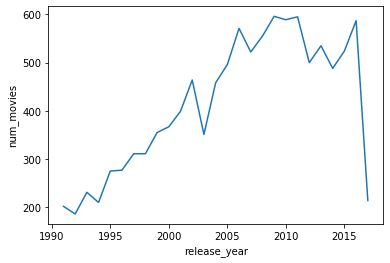

In [25]:
movie_peryear = movies[movies.release_year > 1990]\
    .groupby('release_year', as_index= False).count()
movie_peryear = movie_peryear.filter(['release_year', 'movie_id'])
movie_peryear.rename(columns= {'movie_id': 'num_movies'}, inplace= True)

sns.lineplot(x= movie_peryear.release_year, y= movie_peryear.num_movies);

2017 data is not complete, yet it is the most recent data so the most significant one, we should go on and use average of statistics calculated to quatify success so that we do not oppress the data with fewer quantity and lose their quality

There is an increasing trend in the number of movies per year, that is affected by political and economical events that impacts them negatively in years yet they tend to bounce back

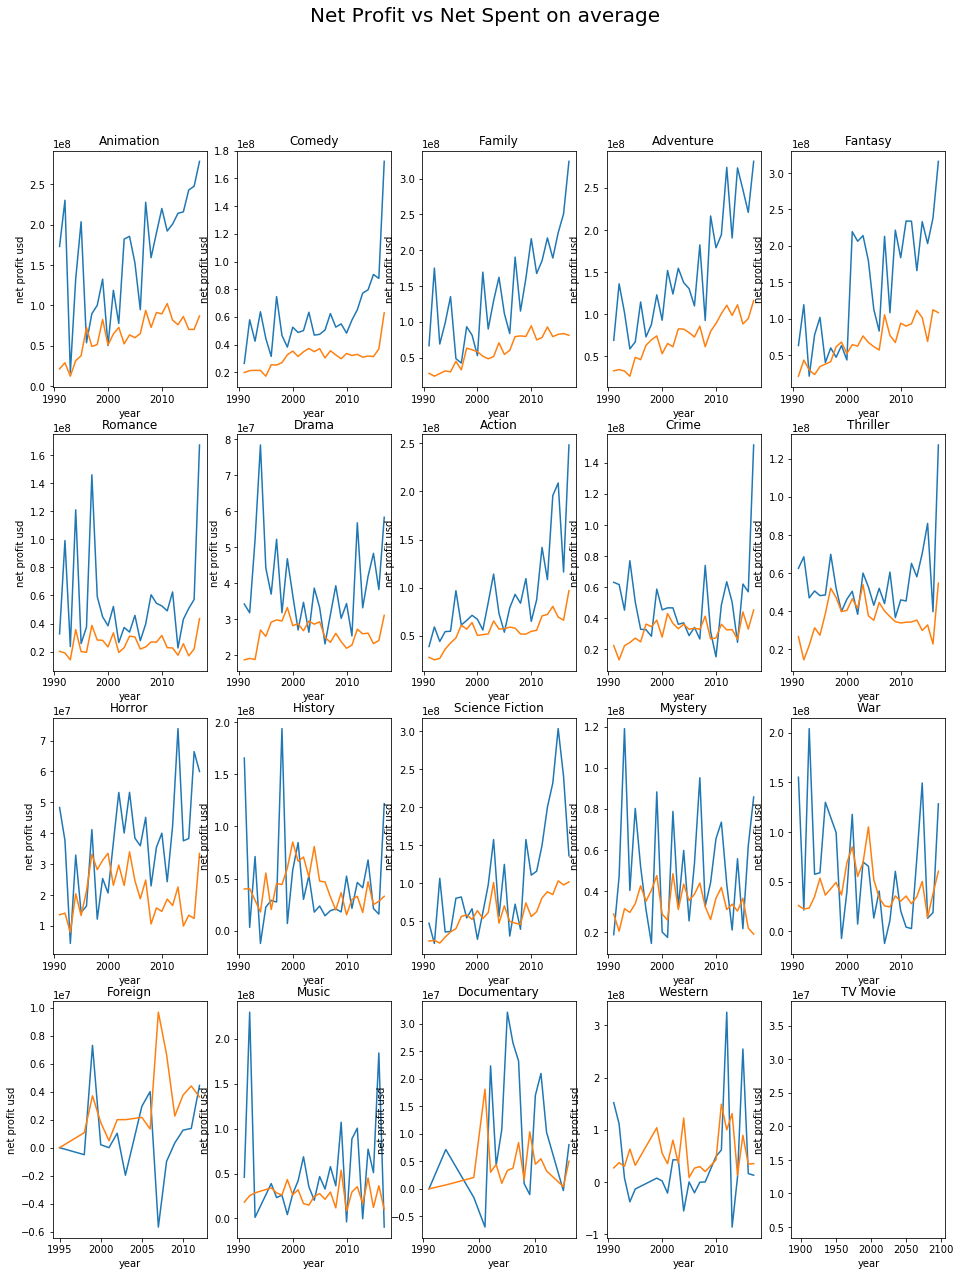

In [26]:
#define plotting region (4 rows, 5 columns)
fig, axes = plt.subplots(4, 5, figsize= (16,20))

plt.suptitle('Net Profit vs Net Spent on average', fontsize= 20)

genres_names = list(genres.genre.unique()) 
for i in range(4):
    for j in range(5):
        g = genres_names[5*i + j]
        df = trend_agg[trend_agg.genre == g]
        axes[i, j].set_xlabel('year')
        axes[i, j].set_ylabel('net profit usd')
        axes[i, j].set_title(g)
        sns.lineplot(x= df.release_year, y= df.profit_average, ax= axes[i,j]);
        sns.lineplot(x= df.release_year, y= df.budget_average, ax= axes[i,j]);

There are notable meaningful obsevations in these 2 groups
1. Animation, Adventure, Fantasy and Science Fiction are the most lucrative 
2. Action is not far behind these genres 
3. Drama, Comedy, Romance and Musical are important genres yet the turnout does not compare well with others
4. Documanetary and Foreign movies are not attracting to audience in theatres

Close look on some genres
1. Animation and Family are tightly bound, they appeal to a vast majority of the audience and an animated family movie is very profitable in the last 10 years
2. Comedy movies are very steady in giving back their money and not very risky
3. Romance have been leading in the 50s, and kept its stability for sometime, in the early 90s it is seen that their luster was getting weary and suffered from fluctuations to stablize at profit near at smaller profit margin
4. Drama movies cost generally less than other genres, I have noticed a spike in their profits in harder times to people in 2002 and 2008/9
5. Action and Science Fiction have increased popularity in the past 5 years 
6. Western Movies were a hit in 2012 which led to people spending more money into them in the next year, and that backfired, so it is easy for producers to be deceived by a spike in revenue and end up losing money

The percentage of movies of the year linked with a genre is an indication with a movie in an indication to the direction of producers in that year

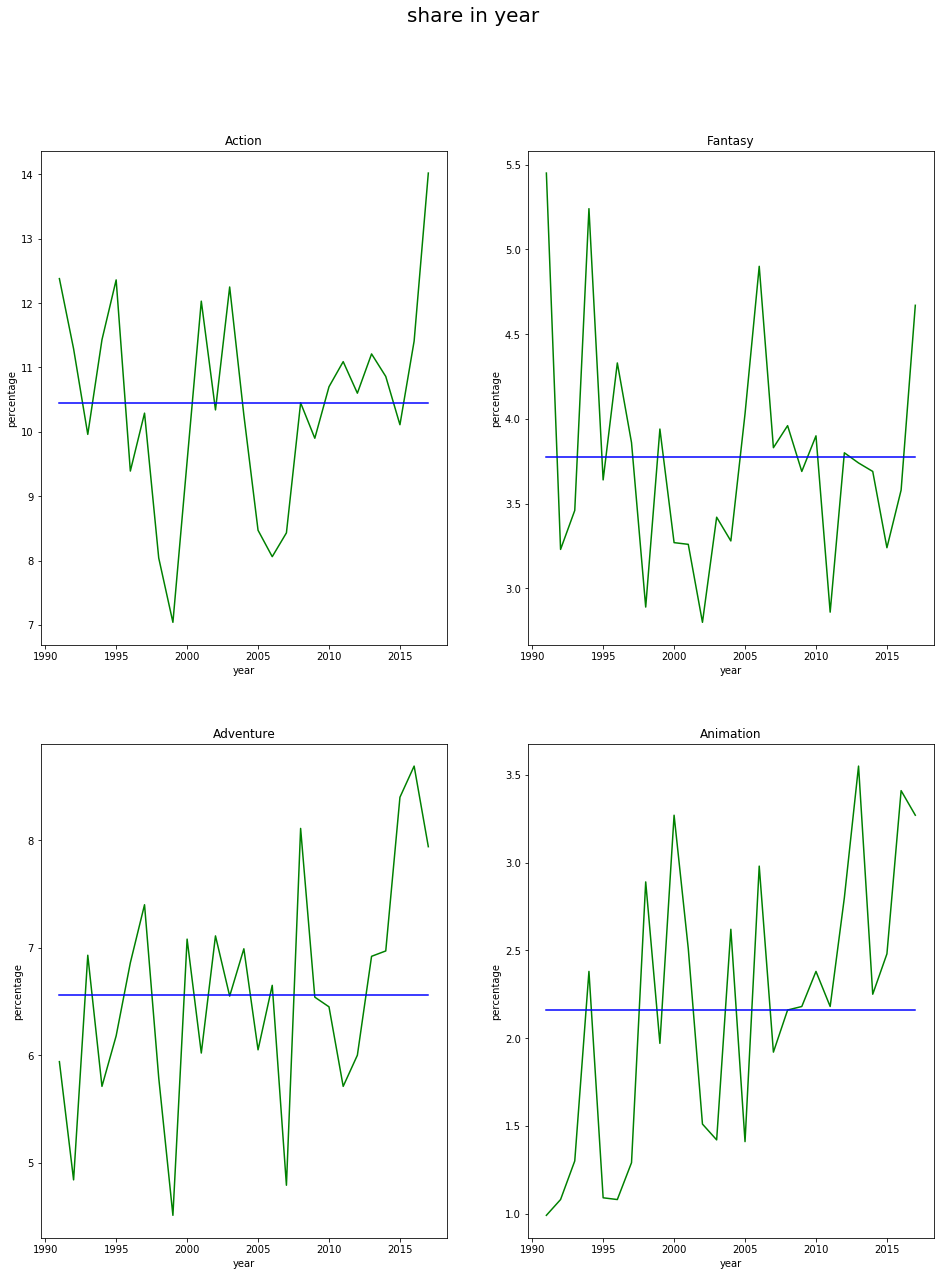

In [27]:
#define plotting region (4 rows, 5 columns)
fig, axes = plt.subplots(2, 2, figsize= (16,20))

plt.suptitle('share in year', fontsize= 20)

genres_names = ['Action', 'Fantasy', 'Adventure', 'Animation']
for i in range(2):
    for j in range(2):
        g = genres_names[2*i + j]
        axes[i, j].set_xlabel('year')
        axes[i, j].set_ylabel('percentage')
        axes[i, j].set_title(g)
        share = 100 * (trend_agg[trend_agg.genre == g].reset_index().num_movies / movie_peryear.num_movies).round(4)
        h = 27 * [np.mean(share)]
        sns.lineplot(x= movie_peryear.release_year, y= share, color= 'g', ax= axes[i,j])
        sns.lineplot(x= movie_peryear.release_year, y= h, color= 'b', ax= axes[i,j])

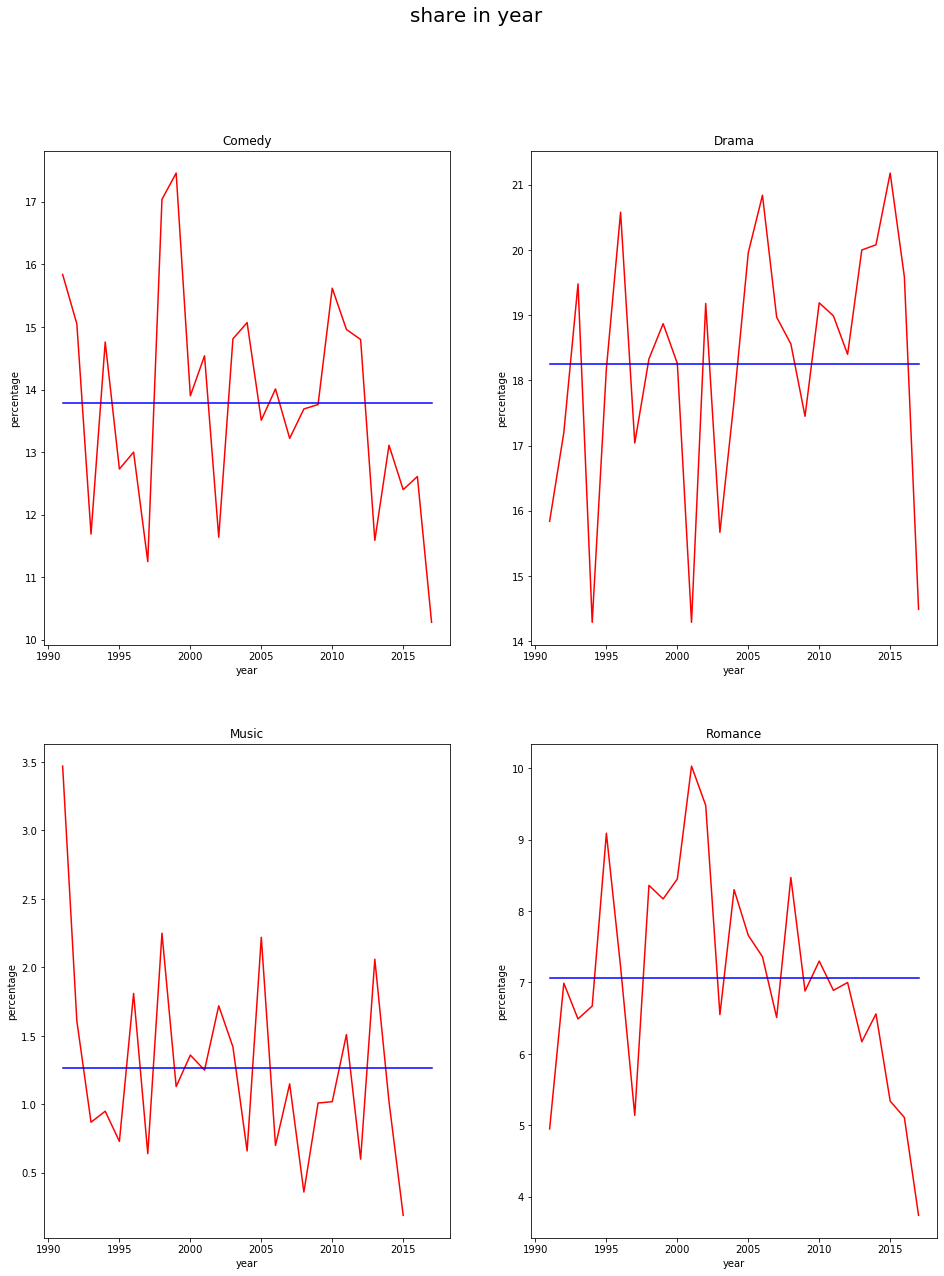

In [30]:
#define plotting region (4 rows, 5 columns)
fig, axes = plt.subplots(2, 2, figsize= (16,20))

plt.suptitle('share in year', fontsize= 20)

genres_names = ['Comedy', 'Drama', 'Music', 'Romance']
for i in range(2):
    for j in range(2):
        g = genres_names[2*i + j]
        axes[i, j].set_xlabel('year')
        axes[i, j].set_ylabel('percentage')
        axes[i, j].set_title(g)
        share = 100 * (trend_agg[trend_agg.genre == g].reset_index().num_movies / movie_peryear.num_movies).round(4)
        h = 27 * [np.mean(share)]
        sns.lineplot(x= movie_peryear.release_year, y= share, color= 'r', ax= axes[i,j])
        sns.lineplot(x= movie_peryear.release_year, y= h, color= 'b', ax= axes[i,j])

In [29]:
movies[movies.title.str.contains('Avatar')]

,movie_id,title,release_date,popularity,budget,revenue,vote_average,vote_count,genre_id,genre,release_year,profit
34214,19995,Avatar,2009-12-10,185.070892,237000000,2.787965e+09,7.2,12114.0,28,Action,2009.0,2.550965e+09
34215,19995,Avatar,2009-12-10,185.070892,237000000,2.787965e+09,7.2,12114.0,12,Adventure,2009.0,2.550965e+09
34216,19995,Avatar,2009-12-10,185.070892,237000000,2.787965e+09,7.2,12114.0,14,Fantasy,2009.0,2.550965e+09
34217,19995,Avatar,2009-12-10,185.070892,237000000,2.787965e+09,7.2,12114.0,878,Science Fiction,2009.0,2.550965e+09


### Conclusion
1. Animation movies share in the yearly movies is increasing, it is usually funded by big companies, yet the independent scene is breaking into the cinamatic market and due to the advance in technology some motivated individuals with remarkable talent are bringing ideas that draws more and more audience to animated features, the main target used to be children and their families but it has upgraded to appeal to everyone
2. Action and Adventure movies are somewhat costly yet they attract audience in a stable manner, an action movie is where you can go to make a movie if you have a good budget, the only increase in actions share is in 2008 during the economics crisis so it is fair to think that these movies have consistent audience
3. Fantasy movies require a large sense of innovation and their variations in the market share reflects the unpredicability they have, they present high risk high reward
4. Comedy and Drama despite being opposites in content, yet they are similar as genres in the audience perception, they represent a large portion of the movies created yet they are not enough on their own, adding an element of another genre of the previously mentioned, other than that they are not known for box office hits, Forrest Gump for instance combines drama with adventure
5. There is a decline in interest in Romance, so they are rebranded as in RomComs or in historian movies, or in musicals like La La Land, a classic romantic movies will not do it in the revenue you would have to spice it up a little
6. Musicals impose a great risk and have a great element of randomness, the well-craftsmanship of the writing, dancing and singing does not necessarily attract audience, which makes jeopardizes the effort put in them.